In [160]:
___Author___='LumberJack Jyss'

In [161]:
print('Global Optimized LumberJack Equities Method\n°OoO_FOREX_Oo0°\nLumberJack Jyss 5779(c)')

Global Optimized LumberJack Equities Method
°OoO_FOREX_Oo0°
LumberJack Jyss 5779(c)


In [162]:
print('Importing librairies...')
import numpy as np
import pandas as pd
import talib
from zigzag import *
import matplotlib.pyplot as plt
import seaborn as sns
import os
print('Librairies imported')

Importing librairies...
Librairies imported


In [163]:
import warnings
warnings.filterwarnings("ignore")

In [164]:
df = pd.read_csv('GLD_daily_5Y.csv')
df = df.iloc[1:,1:-1]

In [165]:
df.shape

(1256, 5)

In [166]:
df.head()

Date    Open    High     Low   Close
1  20140606  120.68  120.77  119.94  120.61
2  20140609  120.79  120.85  120.57  120.65
3  20140610  121.29  121.47  121.21  121.39
4  20140611  121.51  121.61  121.18  121.41
5  20140612  121.92  122.75  121.83  122.64

In [167]:
df.tail()

Date    Open    High     Low   Close
1252  20190528  120.80  120.84  120.46  120.83
1253  20190529  121.11  121.26  120.74  120.87
1254  20190530  120.96  121.69  120.80  121.69
1255  20190531  122.55  123.40  122.31  123.33
1256  20190603  124.09  124.31  123.91  124.30

In [168]:
delta = round(df.shape[0])
bloc1 = round(delta*0.8)
bloc2 = delta - bloc1
print("Study Period : ",delta)
print('Slash: 80% - 20% : ')
print('Bloc 1 : ',bloc1,' periods \nBloc 2 :',bloc2,' periods')

Study Period :  1256
Slash: 80% - 20% : 
Bloc 1 :  1005  periods 
Bloc 2 : 251  periods


In [169]:
dataset_1D = df.copy()

In [170]:
rsi = talib.RSI(dataset_1D['Close'],timeperiod=14)
upper, middle, lower =  talib.BBANDS(dataset_1D['Close'], timeperiod=9, nbdevup=2, nbdevdn=2,matype=0)
sma5 = talib.SMA(dataset_1D['Close'],timeperiod=5)
sma8 = talib.SMA(dataset_1D['Close'],timeperiod=8)
sma10 = talib.SMA(dataset_1D['Close'],timeperiod=10)
sma12 = talib.SMA(dataset_1D['Close'],timeperiod=12)
sma15 = talib.SMA(dataset_1D['Close'],timeperiod=15)
sma30 = talib.SMA(dataset_1D['Close'],timeperiod=30)
sma35 = talib.SMA(dataset_1D['Close'],timeperiod=35)
sma40 = talib.SMA(dataset_1D['Close'],timeperiod=40)
sma45 = talib.SMA(dataset_1D['Close'],timeperiod=45)
sma50 = talib.SMA(dataset_1D['Close'],timeperiod=50)

delta5_8 = sma5 - sma8
delta8_10 = sma8 - sma10
delta10_12 = sma10 - sma12
delta12_15 = sma12 - sma15
delta15_30 = sma15 - sma30
delta30_35 = sma30 - sma35
delta35_40 = sma35 - sma40
delta40_45 = sma40 - sma45
delta45_50 = sma45 - sma50

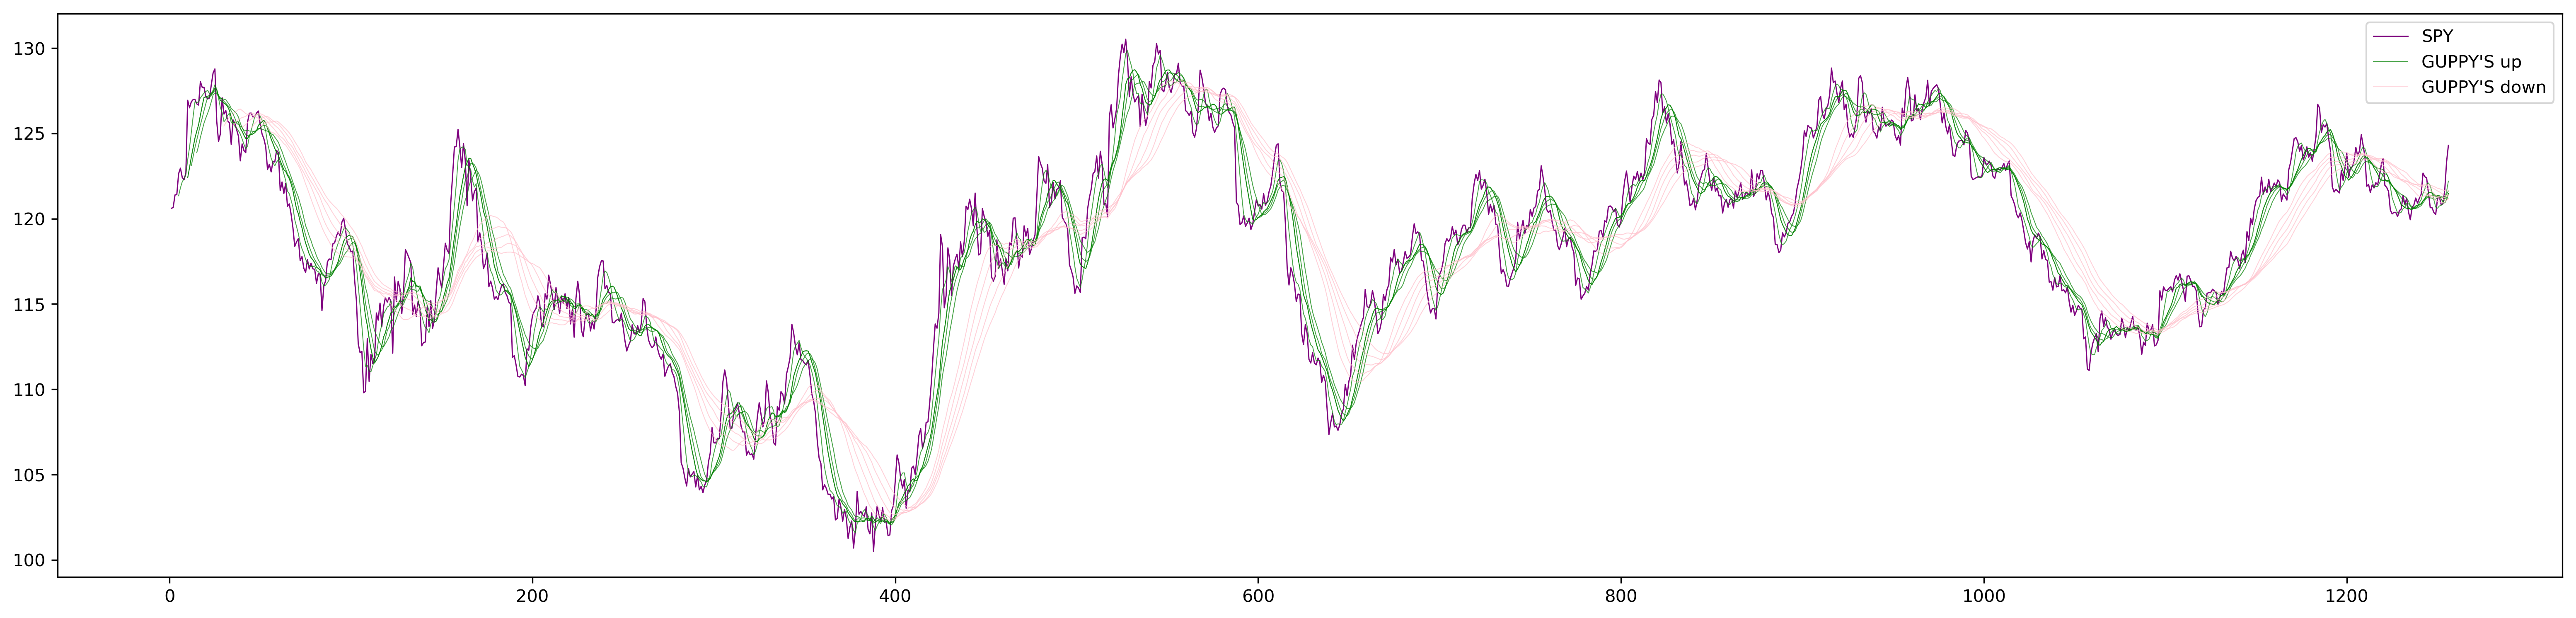

In [171]:
plt.figure(figsize=(26,6),dpi=300)
plt.plot(dataset_1D['Close'],label = 'SPY',color='purple',lw=0.7)
plt.plot(sma5,label = "GUPPY'S up", color='g', alpha=0.7,lw=0.5)
plt.plot(sma10, color='g', alpha=0.7,lw=0.5)
plt.plot(sma10, color='g', alpha=0.7,lw=0.5)
plt.plot(sma12, color='g', alpha=0.7,lw=0.5)
plt.plot(sma15, color='g', alpha=0.7,lw=0.5)
plt.plot(sma30, label = "GUPPY'S down", color='pink', alpha=0.7,lw=0.5)
plt.plot(sma35, color='pink', alpha=0.7,lw=0.5)
plt.plot(sma40, color='pink', alpha=0.7,lw=0.5)
plt.plot(sma45, color='pink', alpha=0.7,lw=0.5)
plt.plot(sma50, color='pink', alpha=0.7,lw=0.5)
plt.legend()
plt.show()

In [172]:
delta5_8.shape,delta8_10.shape, delta10_12.shape, delta12_15.shape, delta15_30 .shape,delta30_35.shape,delta35_40.shape,delta40_45.shape, delta45_50.shape

((1256,),
 (1256,),
 (1256,),
 (1256,),
 (1256,),
 (1256,),
 (1256,),
 (1256,),
 (1256,))

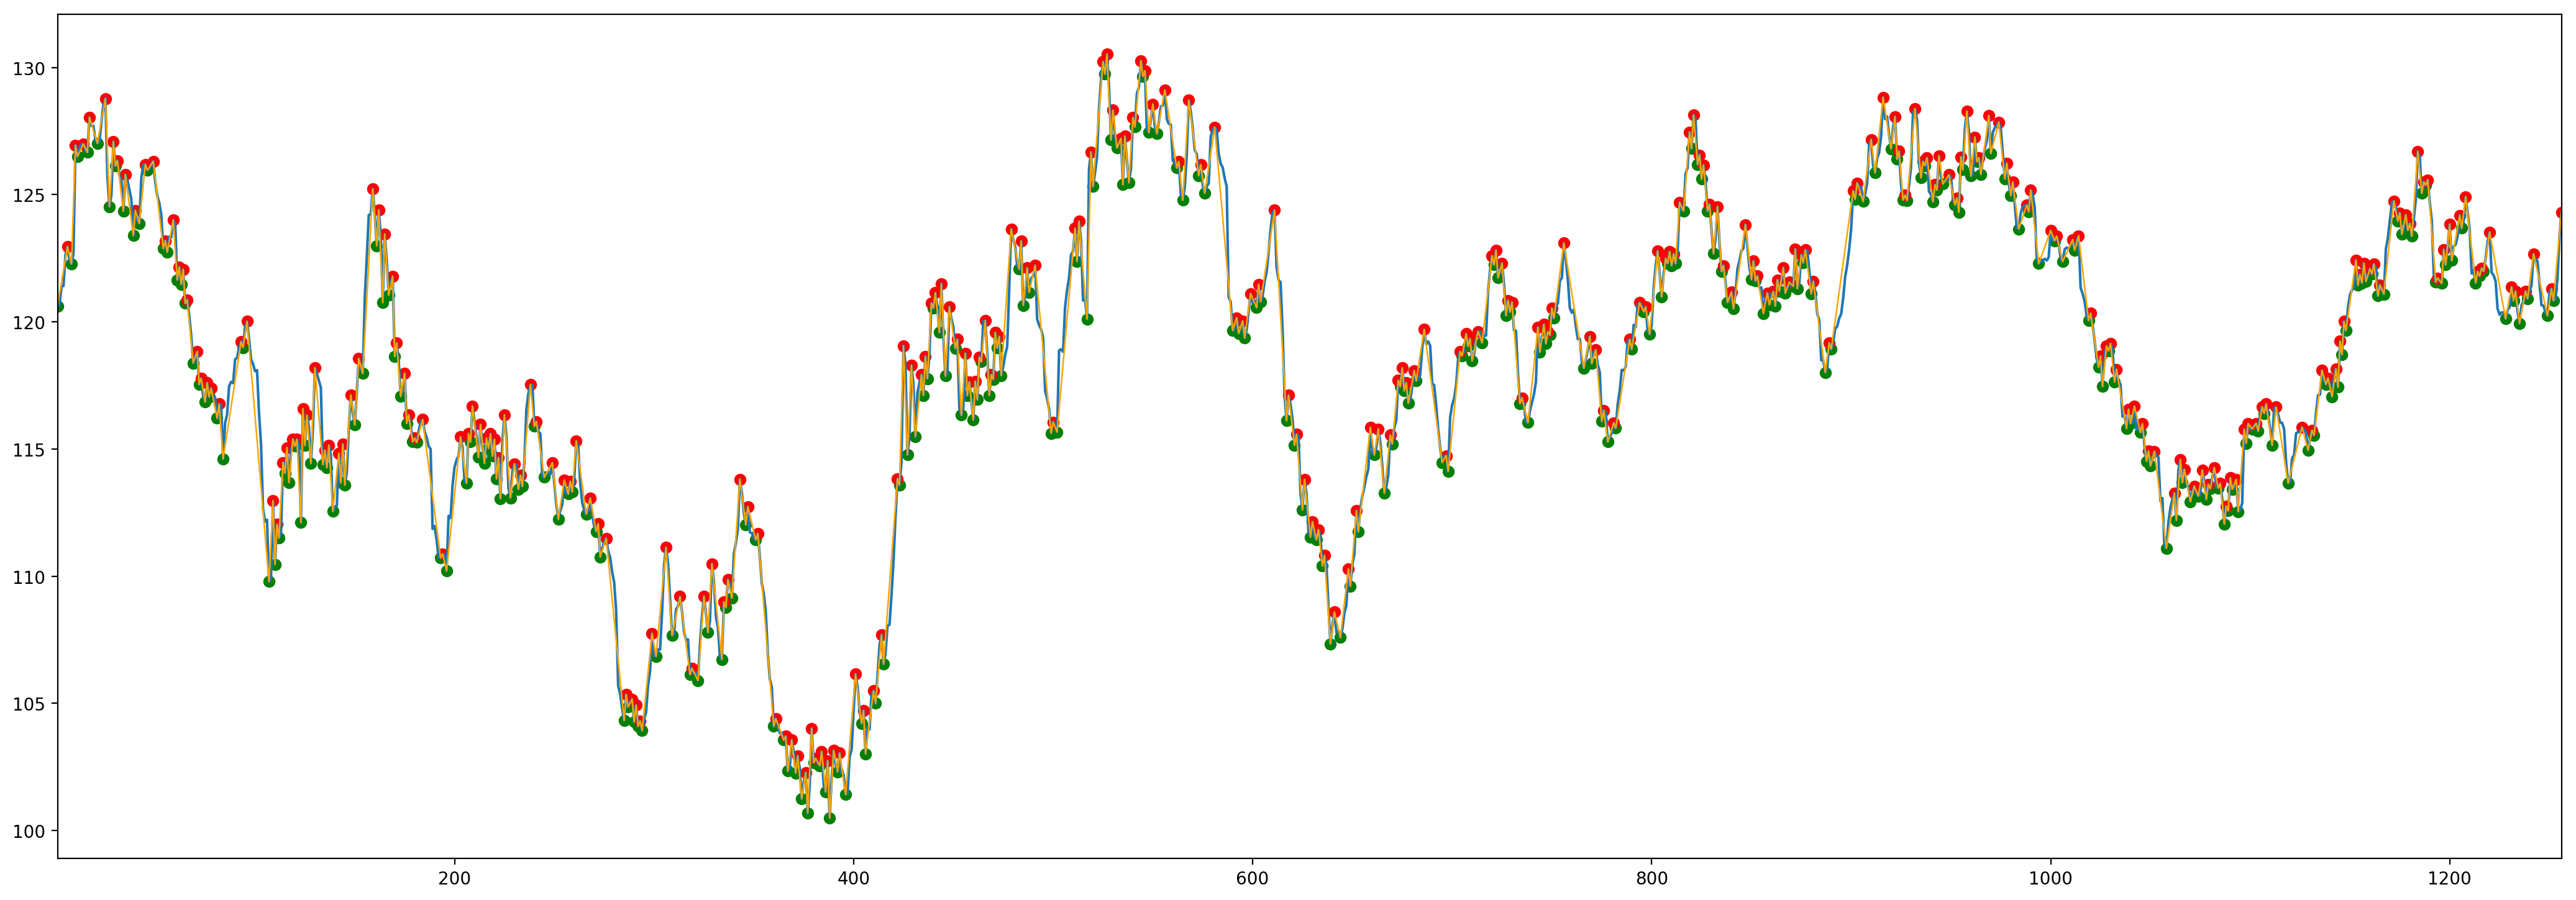

In [173]:
X = dataset_1D['Close']
pivots = peak_valley_pivots(X.values, 0.001, -0.001)
ts_pivots = pd.Series(X, index=X.index)
ts_pivots_up = ts_pivots[pivots == -1]
ts_pivots_down = ts_pivots[pivots == 1]
ts_pivots_all = ts_pivots[pivots!=0]

plt.figure(figsize=(26,9),dpi=200)
X.plot()
#ts_pivots_up.plot(style='g-o',lw=0.8,alpha=0.8)
ts_pivots_all.plot(color='orange',lw=0.9)
plt.scatter(x=ts_pivots_up.index,y=ts_pivots_up[:],c='g')
plt.scatter(x=ts_pivots_down.index,y=ts_pivots_down[:],c='r')
plt.show()
plt.close()

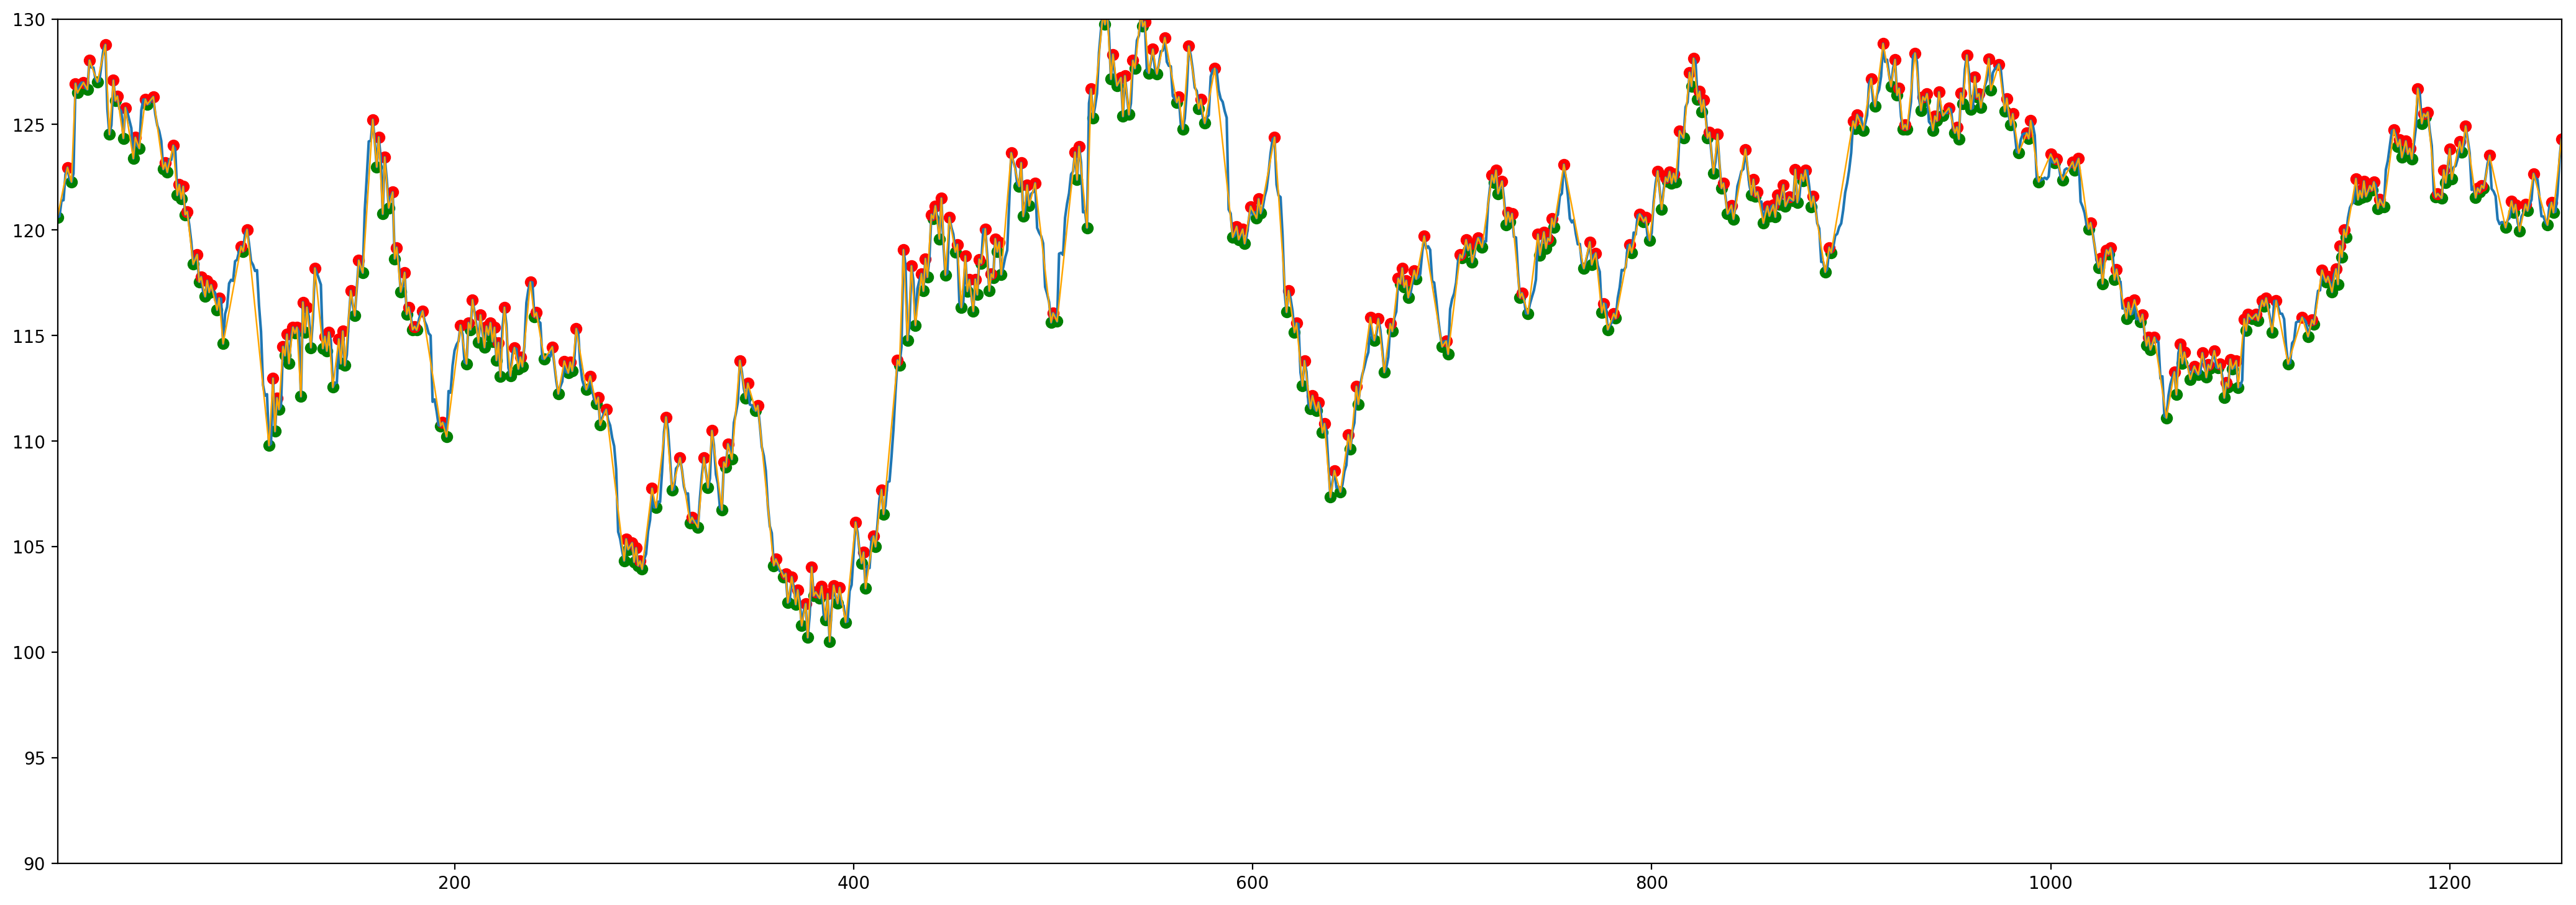

In [174]:
plt.figure(figsize=(26,9),dpi=200)
plt.xlim((900,1300))
plt.ylim((90,130))
plt.plot(X)
#ts_pivots_up.plot(style='g-o',lw=0.8,alpha=0.8)
ts_pivots_all.plot(color='orange',lw=0.9)
plt.scatter(x=ts_pivots_up.index,y=ts_pivots_up[:],c='g')
plt.scatter(x=ts_pivots_down.index,y=ts_pivots_down[:],c='r')
plt.show()
plt.close()

peak = []
valley = []

for i in range(0,dataset_1D.shape[0]):
    if pivots[i] == 1:
        peak.append(pivots[i])
        valley.append(0)
    elif pivots[i] == -1:
        peak.append(0)
        valley.append(pivots[i])
    else:
        peak.append(0)
        valley.append(0)

In [175]:
len(pivots)

1256

In [176]:
bbdelta = upper - middle
price_bolup = dataset_1D['Close'] - lower
price_bolow = dataset_1D['Close'] - upper

In [177]:
ts_pivots.shape,bbdelta.shape,price_bolup.shape,price_bolow.shape,dataset_1D.shape[0]

((1256,), (1256,), (1256,), (1256,), 1256)

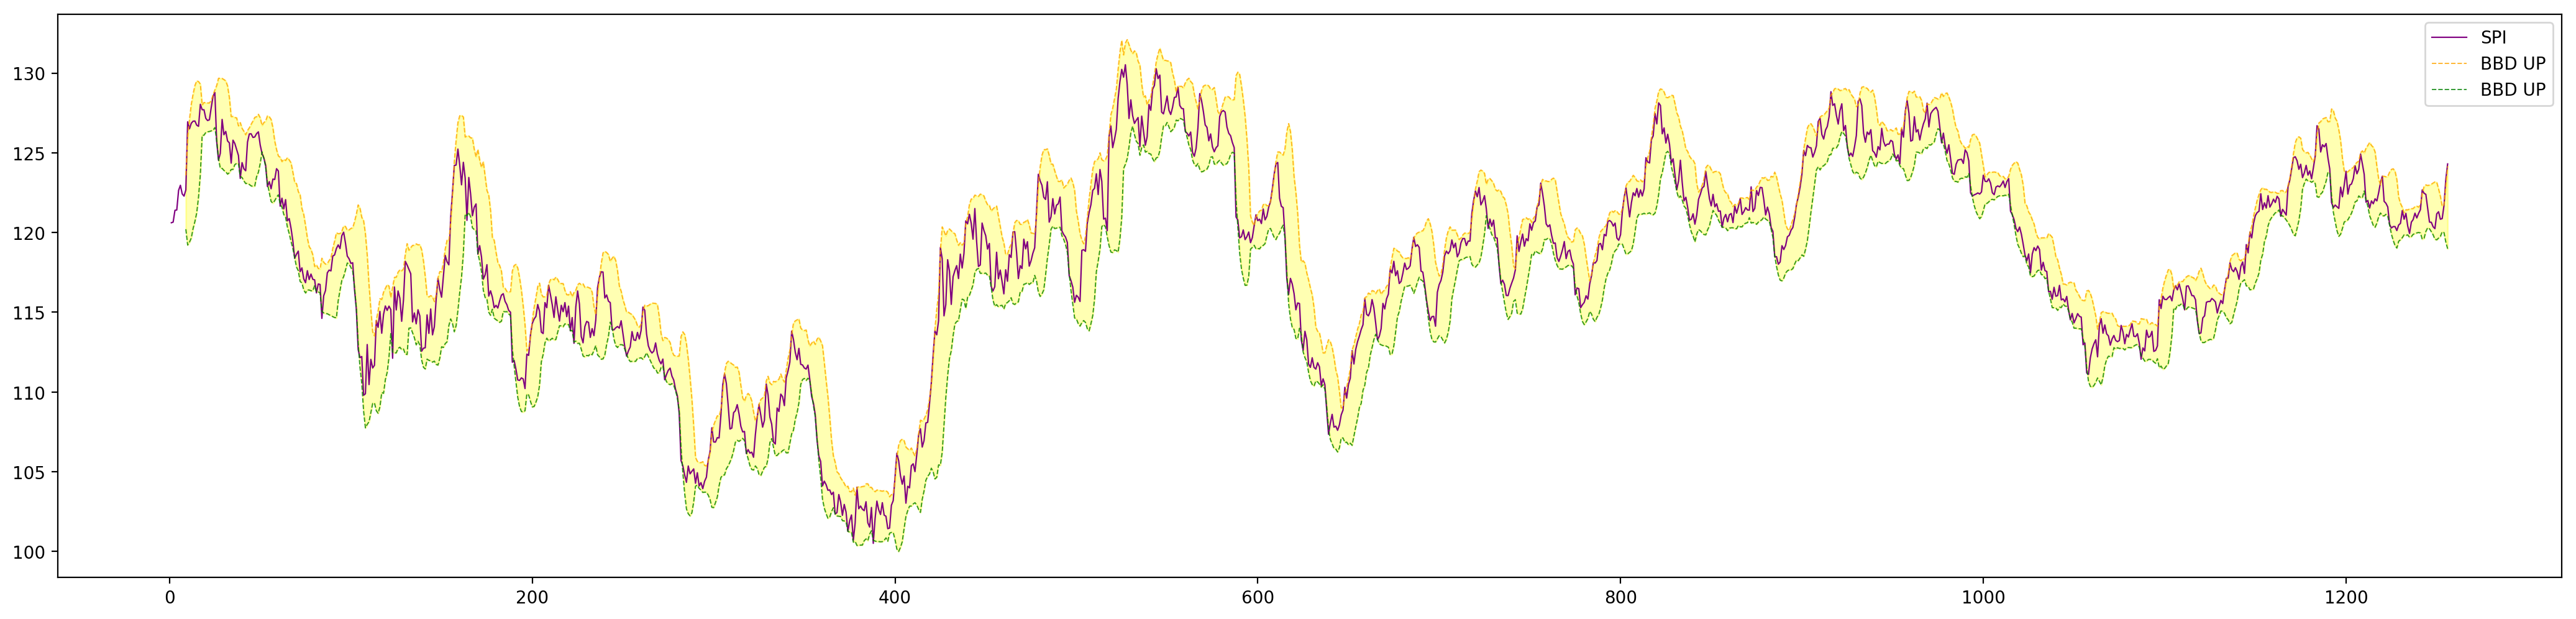

In [178]:
plt.figure(figsize=(26,6),dpi=200)
plt.plot(dataset_1D['Close'],label = 'SPI',color='purple',lw=0.8)
plt.plot(upper,label='BBD UP',color = 'orange',linestyle='--',lw=0.7,alpha=0.8)
plt.plot(lower,label='BBD UP',color = 'green',linestyle='--',lw=0.7,alpha=0.8)
plt.fill_between(x=dataset_1D.index,y1=upper,y2=lower,color='yellow',alpha=0.3)
plt.legend()
plt.show()

In [179]:
rsi[20]

77.36715793418121

In [180]:
rsi25_list = []
rsi75_list = []
for i in range(0,dataset_1D.shape[0]):
    try:
        rsi75_list.append(75 - rsi[i])
        rsi25_list.append(rsi[i] - 25)
    except:
        rsi75_list.append(0)
        rsi25_list.append(0)

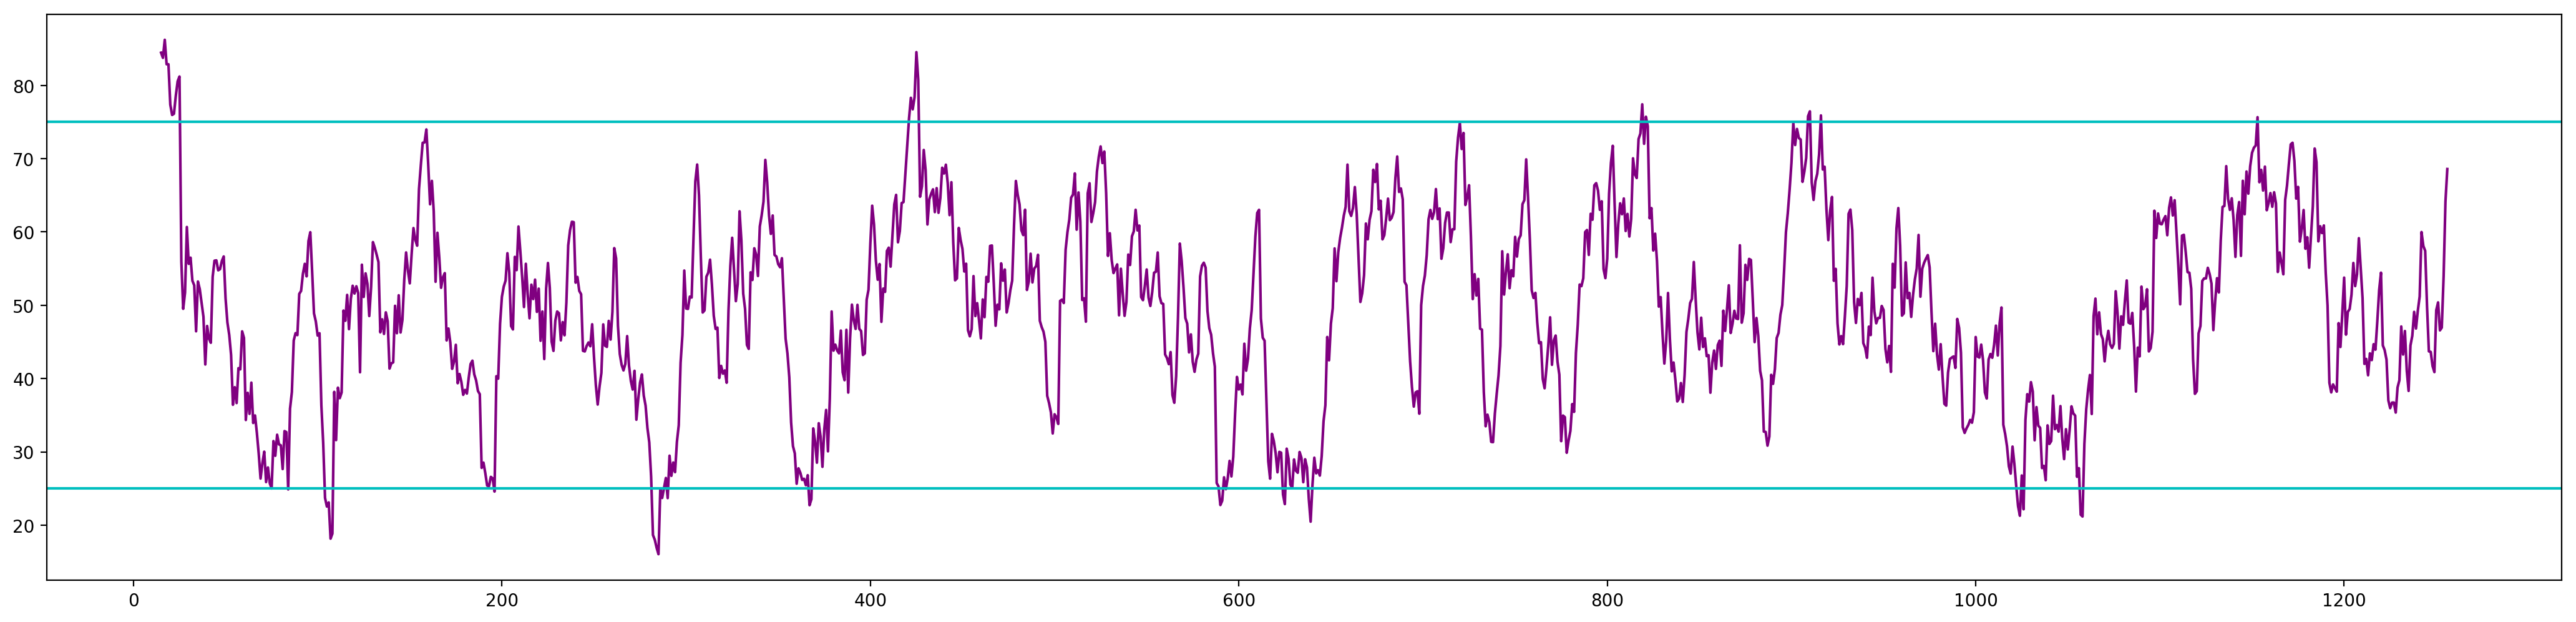

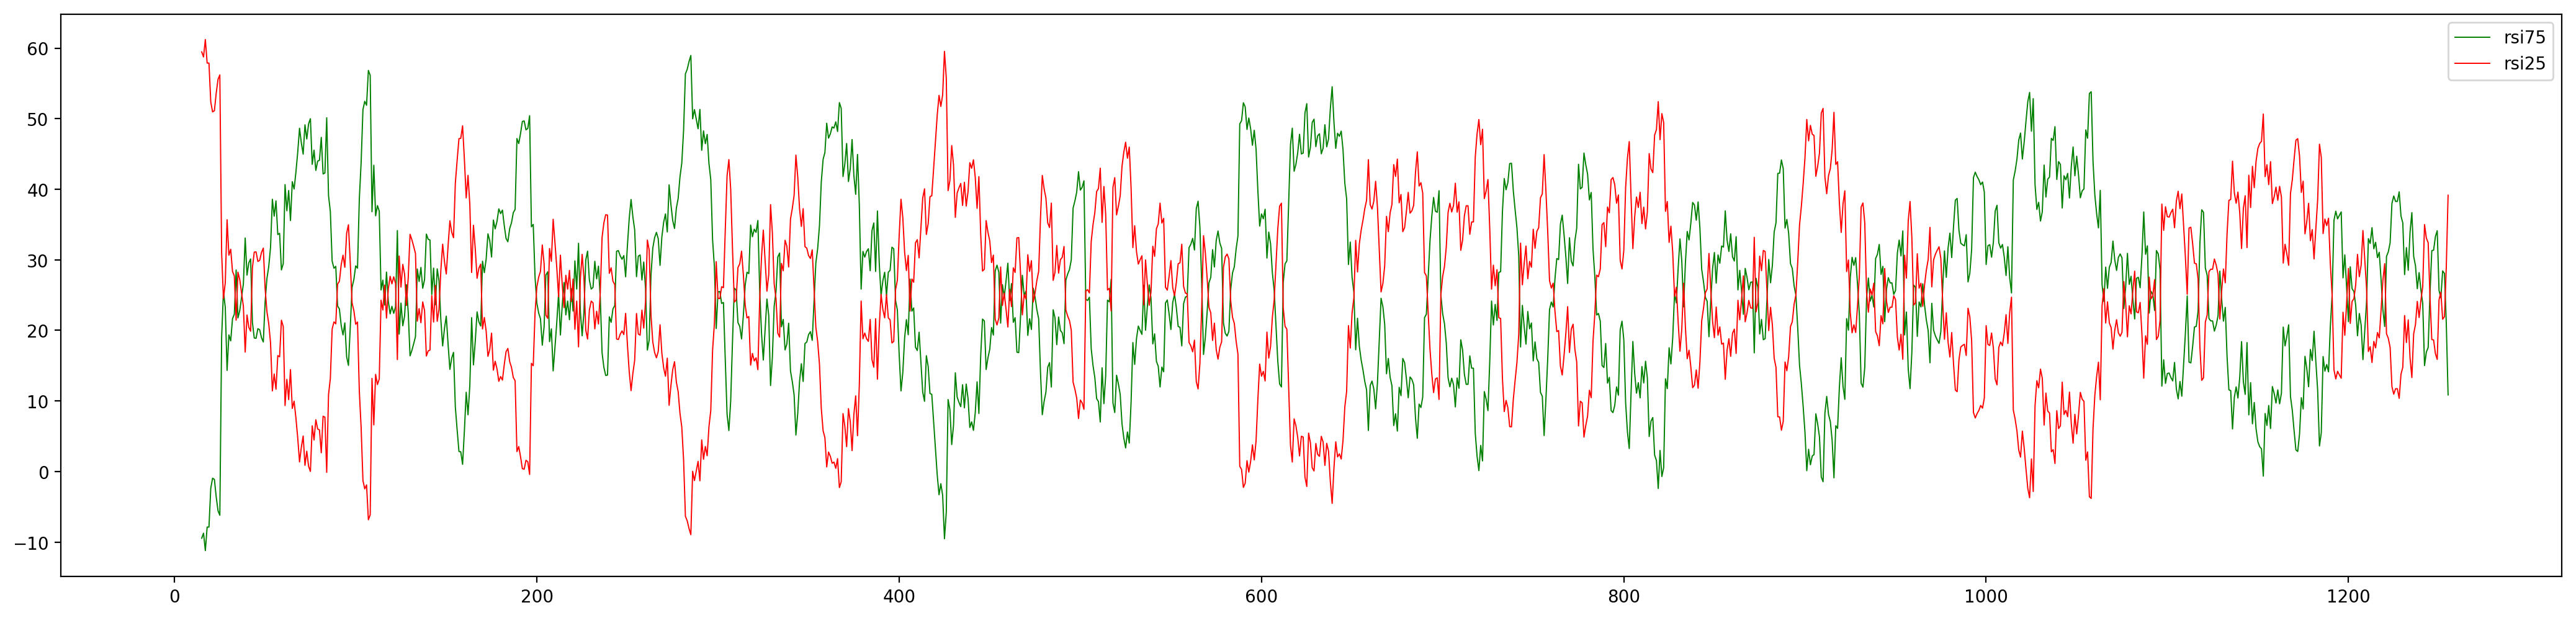

In [181]:
plt.figure(figsize=(26,6),dpi=200)
plt.plot(rsi,label = 'RSI',color='purple')
plt.axhline(y=75,color='c')
plt.axhline(y=25,color='c')

plt.figure(figsize=(26,6),dpi=200)
plt.plot(rsi75_list,label='rsi75',color='green',lw=0.7)
plt.plot(rsi25_list,label='rsi25',color='r',lw=0.7)

plt.legend()
plt.show()

In [182]:
varop_spy = dataset_1D['Open'] - dataset_1D['Close']
varhl_spy = dataset_1D['High'] - dataset_1D['Low']

In [183]:
varop_spy.shape,varhl_spy.shape

((1256,), (1256,))

In [184]:
dataset_1D['Varop_Spy'] = varop_spy
dataset_1D['Varhl_spy'] = varhl_spy
dataset_1D['RSI'] = rsi
dataset_1D['75 - RSI'] = np.array(rsi75_list)
dataset_1D['RSI - 25'] = np.array(rsi25_list)

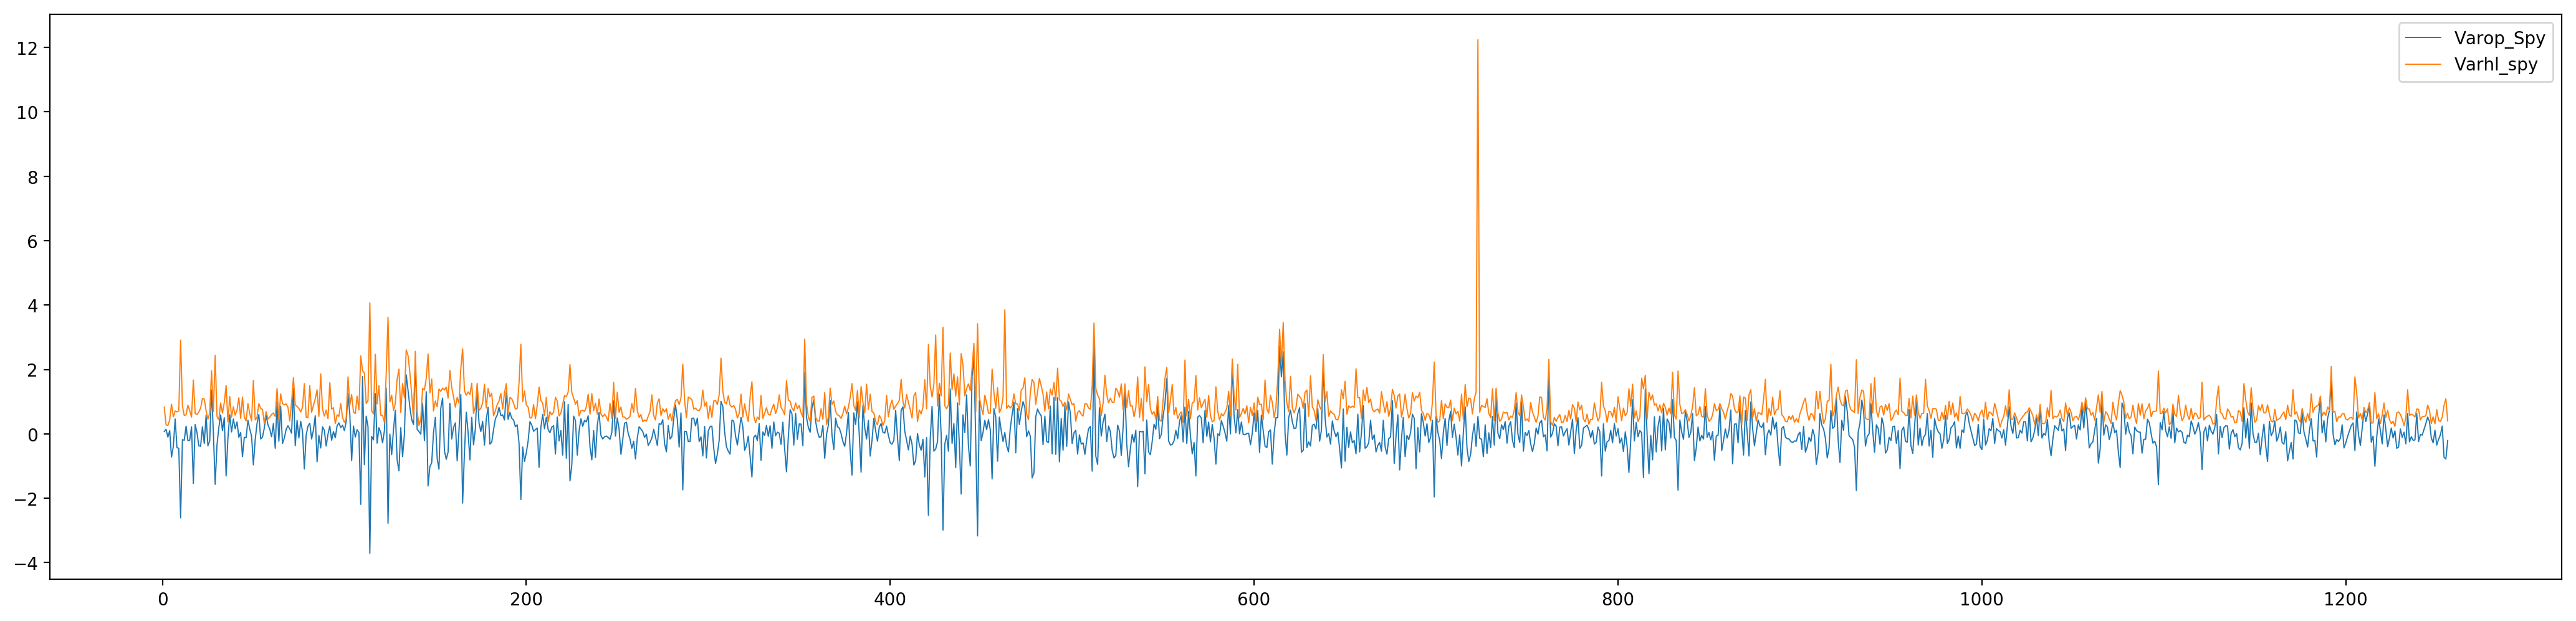

In [185]:
plt.figure(figsize=(26,6),dpi=200)
plt.plot(dataset_1D['Varop_Spy'],label = 'Varop_Spy',lw=0.7)
plt.plot(dataset_1D['Varhl_spy'],label = 'Varhl_spy',lw=0.7)
plt.legend()


In [186]:
dataset_1D.tail()

Date    Open    High     Low   Close  Varop_Spy  Varhl_spy  \
1252  20190528  120.80  120.84  120.46  120.83      -0.03       0.38   
1253  20190529  121.11  121.26  120.74  120.87       0.24       0.52   
1254  20190530  120.96  121.69  120.80  121.69      -0.73       0.89   
1255  20190531  122.55  123.40  122.31  123.33      -0.78       1.09   
1256  20190603  124.09  124.31  123.91  124.30      -0.21       0.40   

            RSI   75 - RSI   RSI - 25  
1252  46.573918  24.608774  25.391226  
1253  46.942299  28.426082  21.573918  
1254  53.951917  28.057701  21.942299  
1255  64.152400  21.048083  28.951917  
1256  68.585002  10.847600  39.152400

In [187]:
dataset_1D['BBD_Delta_Up'] = bbdelta

dataset_1D.tail()

Date    Open    High     Low   Close  Varop_Spy  Varhl_spy  \
1252  20190528  120.80  120.84  120.46  120.83      -0.03       0.38   
1253  20190529  121.11  121.26  120.74  120.87       0.24       0.52   
1254  20190530  120.96  121.69  120.80  121.69      -0.73       0.89   
1255  20190531  122.55  123.40  122.31  123.33      -0.78       1.09   
1256  20190603  124.09  124.31  123.91  124.30      -0.21       0.40   

            RSI   75 - RSI   RSI - 25  BBD_Delta_Up  
1252  46.573918  24.608774  25.391226      1.261111  
1253  46.942299  28.426082  21.573918      0.799135  
1254  53.951917  28.057701  21.942299      0.870884  
1255  64.152400  21.048083  28.951917      1.758698  
1256  68.585002  10.847600  39.152400      2.587854

In [188]:
dataset_1D['delta5_8'] = delta5_8
dataset_1D['delta8_10'] = delta8_10
dataset_1D['delta10_12'] = delta10_12
dataset_1D['delta12_15'] = delta12_15
dataset_1D['delta15_30'] = delta15_30
dataset_1D['delta30_35'] = delta30_35
dataset_1D['delta35_40'] = delta35_40
dataset_1D['delta40_45'] = delta40_45
dataset_1D['delta45_50'] = delta45_50

In [189]:
dataset_1D.tail()

Date    Open    High     Low   Close  Varop_Spy  Varhl_spy  \
1252  20190528  120.80  120.84  120.46  120.83      -0.03       0.38   
1253  20190529  121.11  121.26  120.74  120.87       0.24       0.52   
1254  20190530  120.96  121.69  120.80  121.69      -0.73       0.89   
1255  20190531  122.55  123.40  122.31  123.33      -0.78       1.09   
1256  20190603  124.09  124.31  123.91  124.30      -0.21       0.40   

            RSI   75 - RSI   RSI - 25  BBD_Delta_Up  delta5_8  delta8_10  \
1252  46.573918  24.608774  25.391226      1.261111  -0.05750   -0.31750   
1253  46.942299  28.426082  21.573918      0.799135   0.12450   -0.23850   
1254  53.951917  28.057701  21.942299      0.870884   0.28450   -0.03850   
1255  64.152400  21.048083  28.951917      1.758698   0.38025    0.11575   
1256  68.585002  10.847600  39.152400      2.587854   0.48775    0.24325   

      delta10_12  delta12_15  delta15_30  delta30_35  delta35_40  delta40_45  \
1252   -0.149167    0.039500    0.316000   -0.235048   -0.087036   -0.231694   
1253   -0.261500    0.015500    0.317667   -0.212524   -0.117393   -0.158194   
1254   -0.249833   -0.118167    0.330333   -0.131476   -0.151857   -0.107444   
1255   -0.140333   -0.187667    0.370667   -0.024095   -0.195821   -0.062083   
1256    0.065500   -0.219833    0.431000    0.039762   -0.183429   -0.060667   

      delta45_50  
1252   -0.214756  
1253   -0.261356  
1254   -0.285556  
1255   -0.275667  
1256   -0.234733

In [190]:
len(peak),len(valley),len(ts_pivots)

(1256, 1256, 1256)

In [191]:
modes = pivots_to_modes(pivots)
pd.Series(X).pct_change().groupby(modes).describe().unstack()

count  -1    627.000000
        1    628.000000
mean   -1     -0.005865
        1      0.005970
std    -1      0.005293
        1      0.005882
min    -1     -0.034711
        1     -0.000961
25%    -1     -0.007830
        1      0.002103
50%    -1     -0.004623
        1      0.004157
75%    -1     -0.002059
        1      0.008055
max    -1      0.000997
        1      0.049122
dtype: float64

In [192]:
compute_segment_returns(X, pivots).sum()

0.0

In [193]:

max_drawdown(np.array(X))

0.21959931666407828

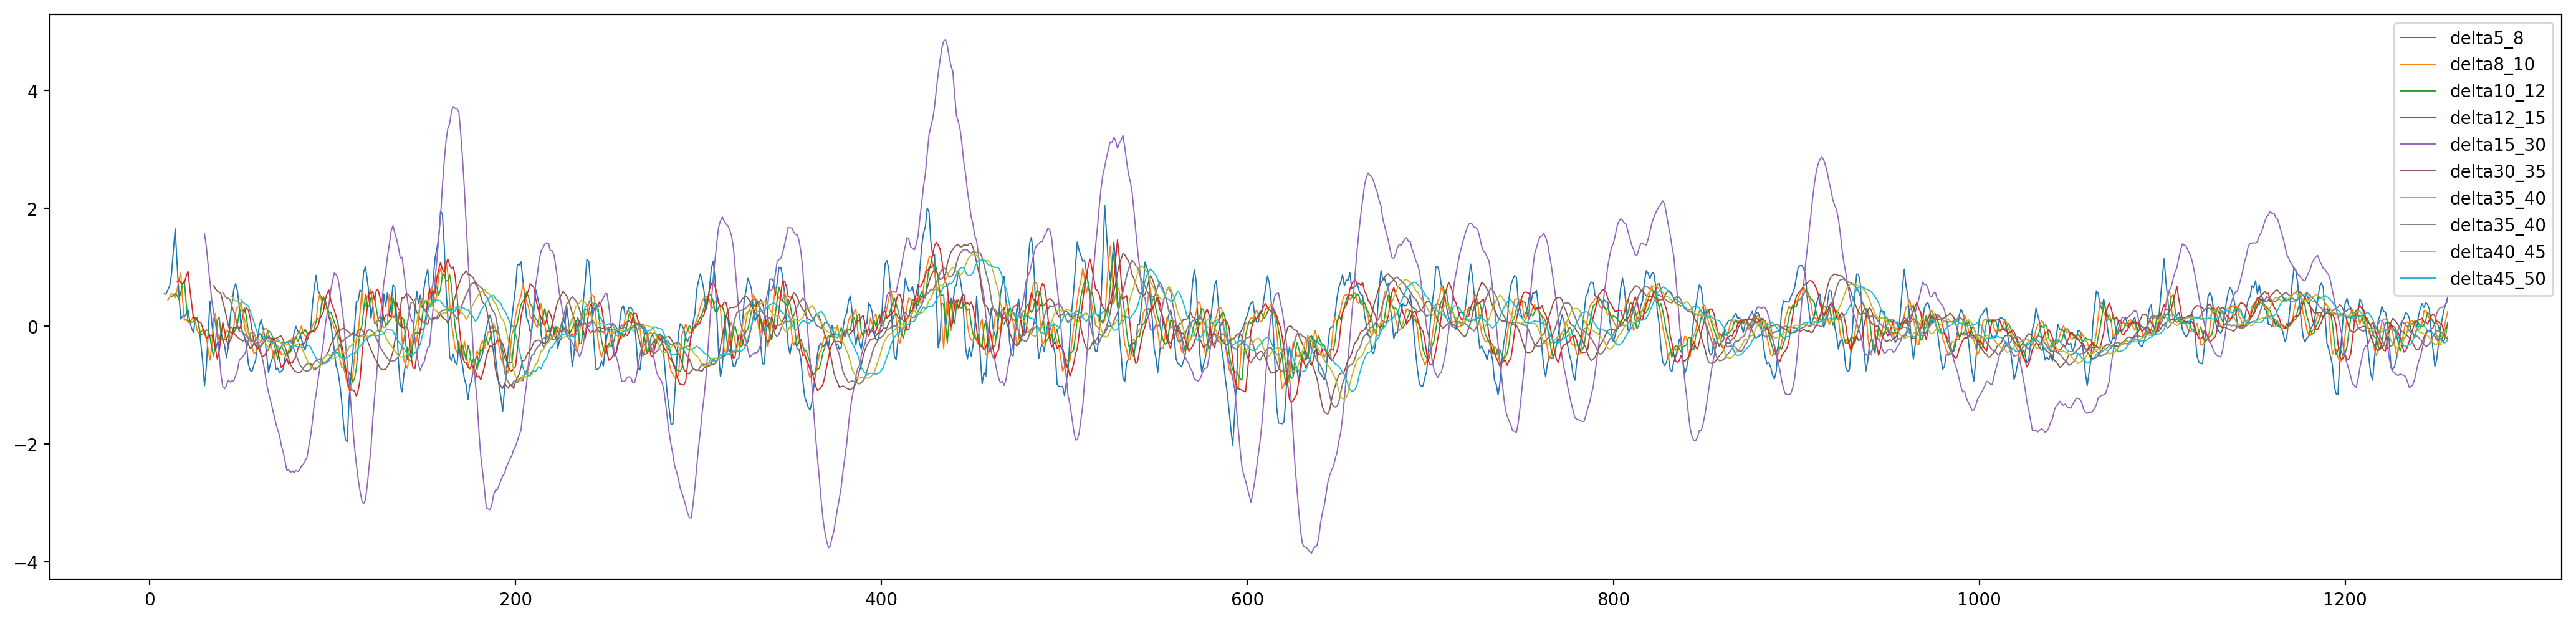

In [194]:
plt.figure(figsize=(26,6),dpi=200)
plt.plot(dataset_1D['delta5_8'],label = 'delta5_8',lw=0.7)
plt.plot(dataset_1D['delta8_10'],label = 'delta8_10',lw=0.7)
plt.plot(dataset_1D['delta10_12'],label = 'delta10_12',lw=0.7)
plt.plot(dataset_1D['delta12_15'],label = 'delta12_15',lw=0.7)
plt.plot(dataset_1D['delta15_30'],label = 'delta15_30',lw=0.7)
plt.plot(dataset_1D['delta30_35'],label = 'delta30_35',lw=0.7)
plt.plot(dataset_1D['delta35_40'],label = 'delta35_40',lw=0.7)
plt.plot(dataset_1D['delta35_40'],label = 'delta35_40',lw=0.7)
plt.plot(dataset_1D['delta40_45'],label = 'delta40_45',lw=0.7)
plt.plot(dataset_1D['delta45_50'],label = 'delta45_50',lw=0.7)
plt.legend()

delta_1_2 = []
delta_1_3 =[]
delta_2_3 = []

delta_1_2.append(0)
delta_1_3.append(0)

delta_2_3.append(0)



for i in range(1,dataset_1D.shape[0]-1):
    delta_1_2.append(dataset_1D.iloc[-i,4] - dataset_1D.iloc[-i-1,4])
        
for i in range(1,dataset_1D.shape[0]-2):
     delta_1_3.append(dataset_1D.iloc[-i,4] - dataset_1D.iloc[-i-2,4])
    
for i in range(1,dataset_1D.shape[0]-2):
     delta_2_3.append(dataset_1D.iloc[-i-1,4] - dataset_1D.iloc[-i-2,4])

delta_1_2.append(0)
delta_1_3.append(0)
delta_2_3.append(0)
delta_1_3.append(0)
delta_2_3.append(0)


len(delta_1_2),len(delta_1_3),len(delta_2_3)

dataset_1D['delta_1_2'] = delta_1_2
dataset_1D['delta_2_3'] = delta_2_3
dataset_1D['delta_1_3'] = delta_1_3

In [195]:
dataset_1D.tail()

Date    Open    High     Low   Close  Varop_Spy  Varhl_spy  \
1252  20190528  120.80  120.84  120.46  120.83      -0.03       0.38   
1253  20190529  121.11  121.26  120.74  120.87       0.24       0.52   
1254  20190530  120.96  121.69  120.80  121.69      -0.73       0.89   
1255  20190531  122.55  123.40  122.31  123.33      -0.78       1.09   
1256  20190603  124.09  124.31  123.91  124.30      -0.21       0.40   

            RSI   75 - RSI   RSI - 25  BBD_Delta_Up  delta5_8  delta8_10  \
1252  46.573918  24.608774  25.391226      1.261111  -0.05750   -0.31750   
1253  46.942299  28.426082  21.573918      0.799135   0.12450   -0.23850   
1254  53.951917  28.057701  21.942299      0.870884   0.28450   -0.03850   
1255  64.152400  21.048083  28.951917      1.758698   0.38025    0.11575   
1256  68.585002  10.847600  39.152400      2.587854   0.48775    0.24325   

      delta10_12  delta12_15  delta15_30  delta30_35  delta35_40  delta40_45  \
1252   -0.149167    0.039500    0.316000   -0.235048   -0.087036   -0.231694   
1253   -0.261500    0.015500    0.317667   -0.212524   -0.117393   -0.158194   
1254   -0.249833   -0.118167    0.330333   -0.131476   -0.151857   -0.107444   
1255   -0.140333   -0.187667    0.370667   -0.024095   -0.195821   -0.062083   
1256    0.065500   -0.219833    0.431000    0.039762   -0.183429   -0.060667   

      delta45_50  
1252   -0.214756  
1253   -0.261356  
1254   -0.285556  
1255   -0.275667  
1256   -0.234733

In [196]:
tsf = talib.TSF(dataset_1D['Close'],timeperiod=14)
type(tsf),len(tsf)

(pandas.core.series.Series, 1256)

In [197]:
delta_tsf = dataset_1D['Close'] - tsf
dataset_1D['delta_tsf'] = tsf
delta_tsf.shape

(1256,)

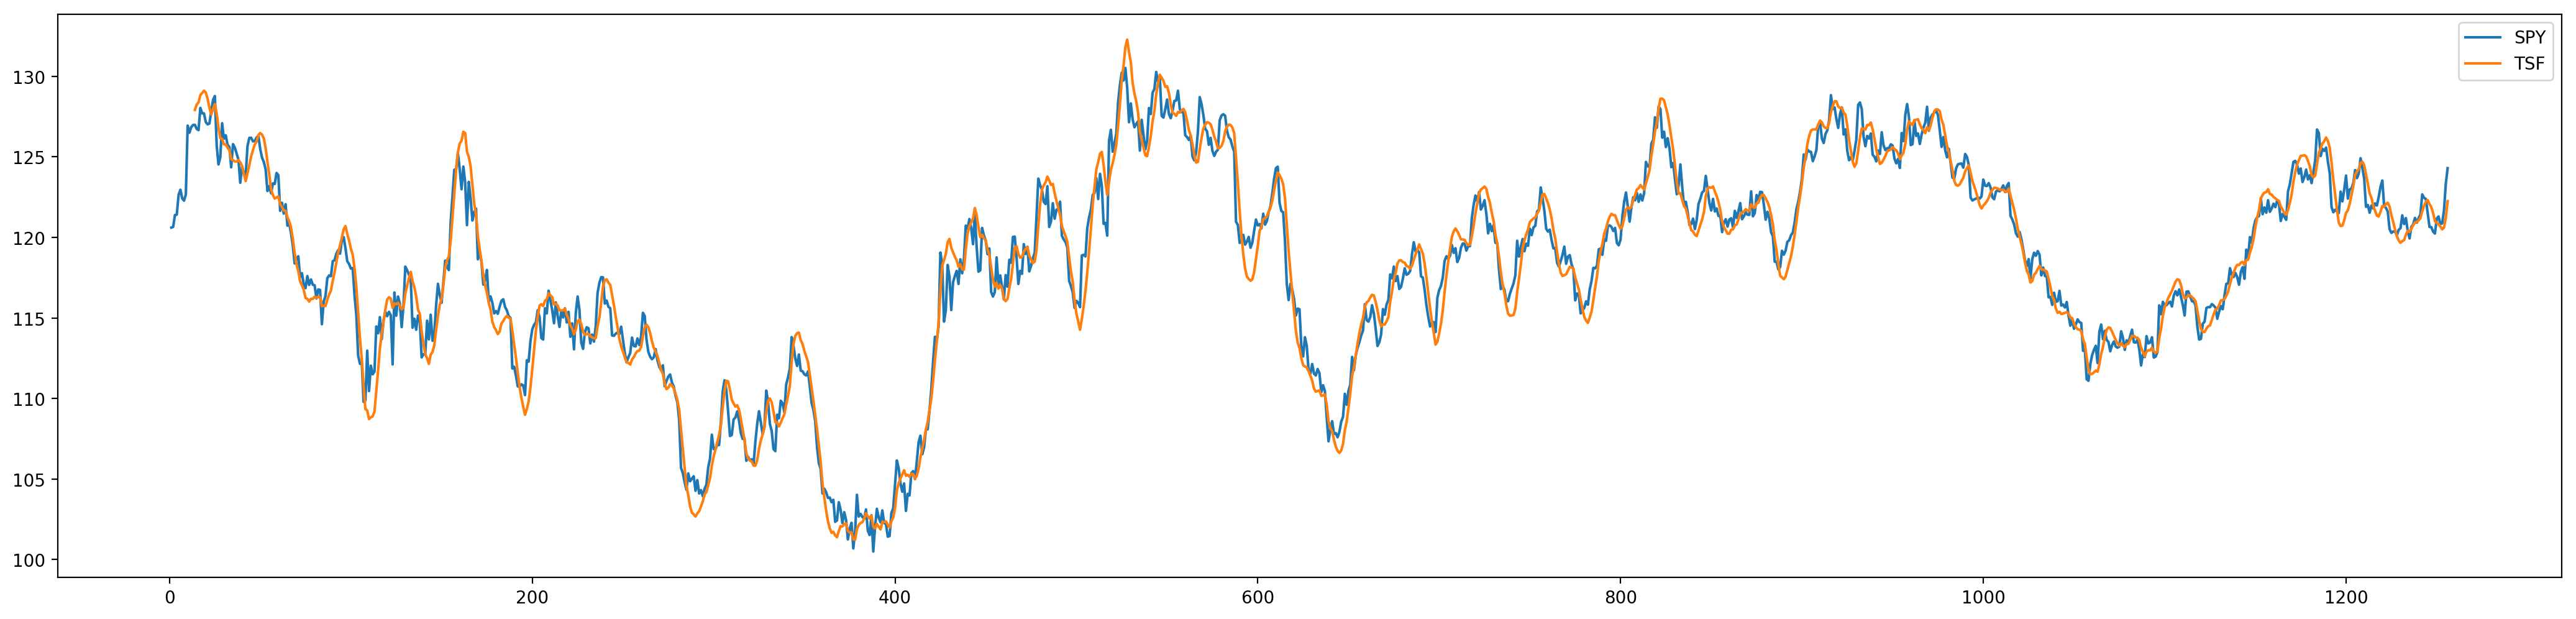

In [198]:
plt.figure(figsize=(26,6),dpi=200)
plt.plot(dataset_1D['Close'],label = 'SPY')
#plt.plot(dataset_1D['delta_tsf'],label = 'DELTA TSF SPY')
plt.plot(tsf,label='TSF')
plt.legend()
plt.show()

In [199]:
forosc = []
forosc.append(0)
for i in range(1,dataset_1D.shape[0]):
    try:
        forosc.append((dataset_1D.iloc[i,4] - tsf[i-1])*100/dataset_1D.iloc[i,4])
    except:
        forosc.append(0)
len(forosc),type(forosc)

(1256, list)

In [200]:
dataset_1D['Forcast Oscillator'] = (forosc)

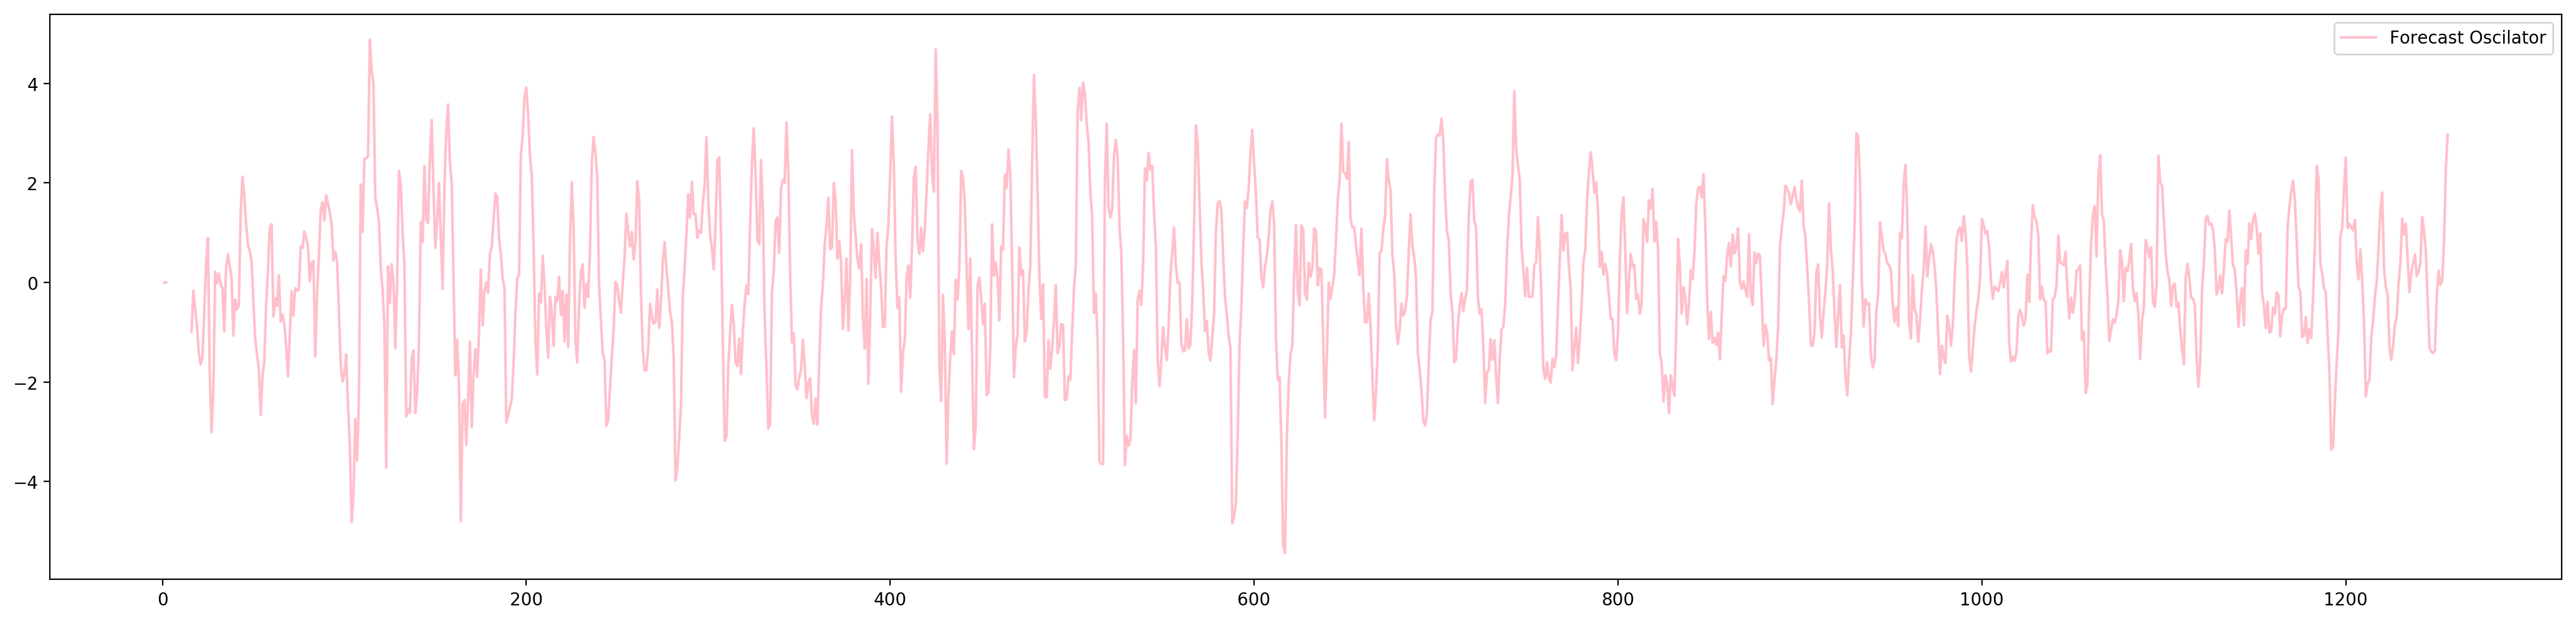

In [201]:
plt.figure(figsize=(26,6),dpi=200)
#plt.plot(dataset_1D['Close'],label = 'SPY')
#plt.plot(dataset_1D['delta_tsf'],label = 'DELTA TSF SPY')
plt.plot(dataset_1D['Forcast Oscillator'],label='Forecast Oscilator',color='pink')
plt.legend()
plt.show()

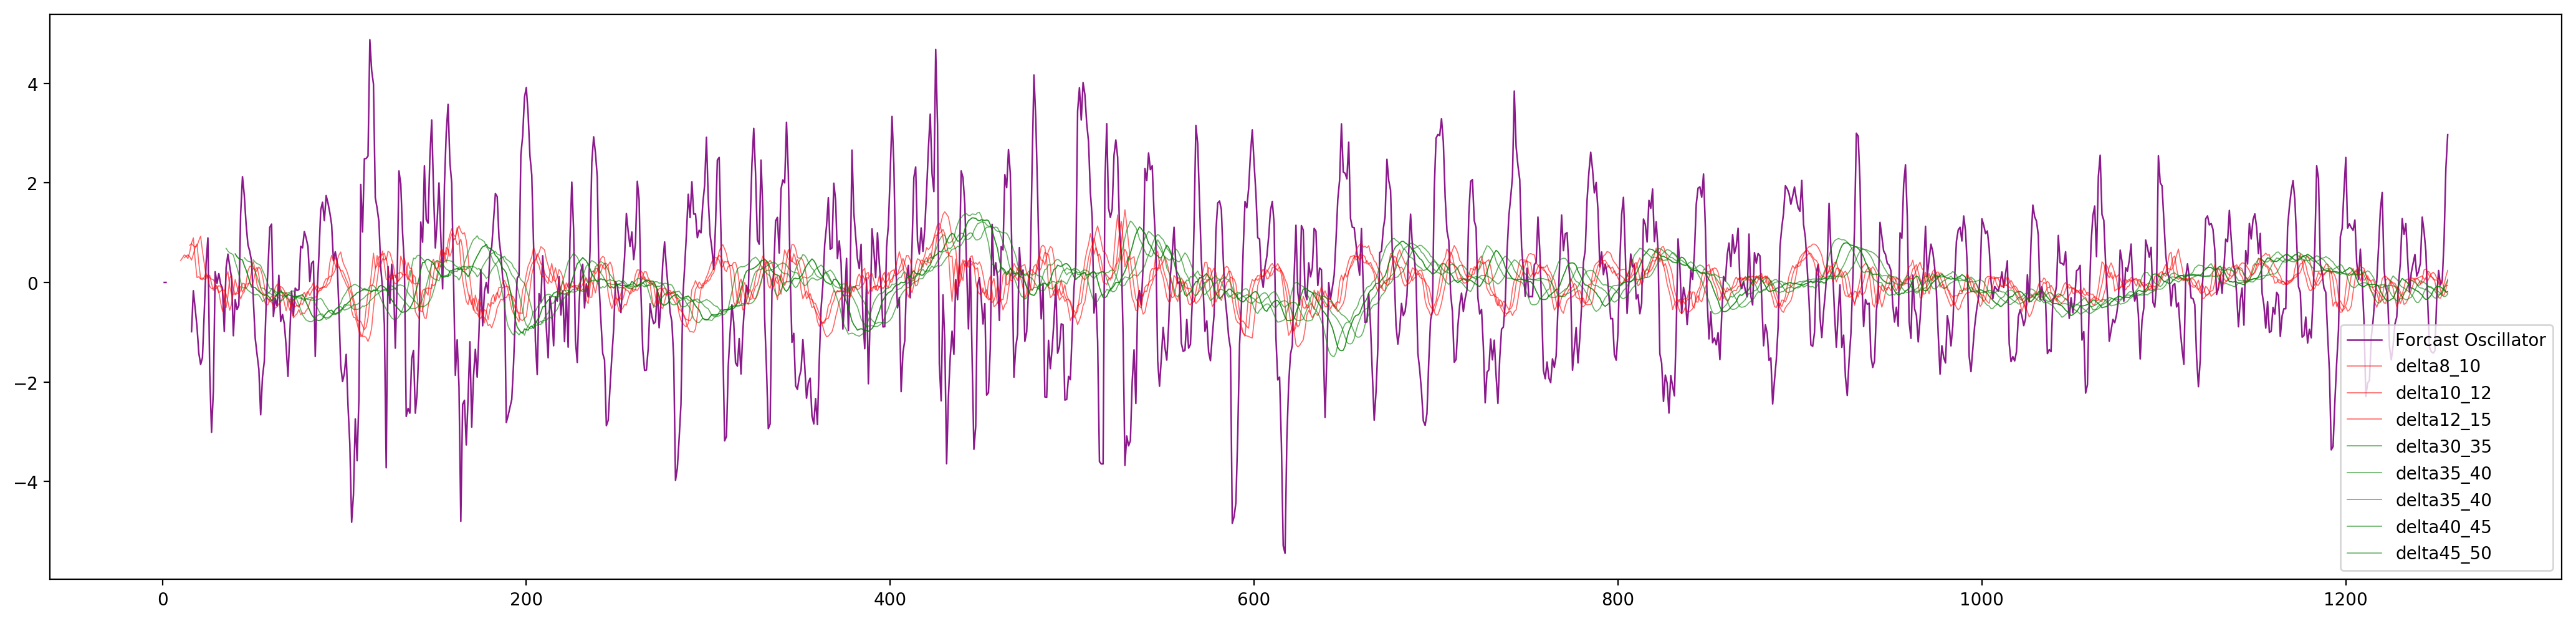

In [202]:
plt.figure(figsize=(26,6),dpi=200)
plt.plot(dataset_1D['Forcast Oscillator'],label = 'Forcast Oscillator',lw=0.9,color='purple',alpha=0.9)
#plt.plot(dataset_1W['delta5_8'],label = 'delta5_8',lw=0.6,color='r',alpha=0.6)
plt.plot(dataset_1D['delta8_10'],label = 'delta8_10',lw=0.6,color='r',alpha=0.6)
plt.plot(dataset_1D['delta10_12'],label = 'delta10_12',lw=0.6,color='r',alpha=0.6)
plt.plot(dataset_1D['delta12_15'],label = 'delta12_15',lw=0.6,color='r',alpha=0.6)
#plt.plot(dataset_1W['delta15_30'],label = 'delta15_30',lw=0.6,color='r',alpha=0.6)
plt.plot(dataset_1D['delta30_35'],label = 'delta30_35',lw=0.6,color='g',alpha=0.6)
plt.plot(dataset_1D['delta35_40'],label = 'delta35_40',lw=0.6,color='g',alpha=0.6)
plt.plot(dataset_1D['delta35_40'],label = 'delta35_40',lw=0.6,color='g',alpha=0.6)
plt.plot(dataset_1D['delta40_45'],label = 'delta40_45',lw=0.6,color='g',alpha=0.6)
plt.plot(dataset_1D['delta45_50'],label = 'delta45_50',lw=0.6,color='g',alpha=0.6)
plt.legend()

In [203]:
dataset_1D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 1 to 1256
Data columns (total 22 columns):
Date                  1256 non-null int64
Open                  1256 non-null float64
High                  1256 non-null float64
Low                   1256 non-null float64
Close                 1256 non-null float64
Varop_Spy             1256 non-null float64
Varhl_spy             1256 non-null float64
RSI                   1242 non-null float64
75 - RSI              1242 non-null float64
RSI - 25              1242 non-null float64
BBD_Delta_Up          1248 non-null float64
delta5_8              1249 non-null float64
delta8_10             1247 non-null float64
delta10_12            1245 non-null float64
delta12_15            1242 non-null float64
delta15_30            1227 non-null float64
delta30_35            1222 non-null float64
delta35_40            1217 non-null float64
delta40_45            1212 non-null float64
delta45_50            1207 non-null float64
delta_tsf      

In [204]:
df.head(0)

Empty DataFrame
Columns: [Date, Open, High, Low, Close]
Index: []

In [205]:
dataset_1D['target_up'] = abs(np.array(valley))
dataset_1D['target_down'] = abs(np.array(peak))

dataset_1D['target_up'].sum(),dataset_1D['target_down'].sum()

(298, 298)

In [206]:
dataset_1D['target_value'] = dataset_1D['Close']
dataset_1D = dataset_1D.drop(['Open','High','Low','Close'],axis=1)

In [207]:
dataset_1D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 1 to 1256
Data columns (total 21 columns):
Date                  1256 non-null int64
Varop_Spy             1256 non-null float64
Varhl_spy             1256 non-null float64
RSI                   1242 non-null float64
75 - RSI              1242 non-null float64
RSI - 25              1242 non-null float64
BBD_Delta_Up          1248 non-null float64
delta5_8              1249 non-null float64
delta8_10             1247 non-null float64
delta10_12            1245 non-null float64
delta12_15            1242 non-null float64
delta15_30            1227 non-null float64
delta30_35            1222 non-null float64
delta35_40            1217 non-null float64
delta40_45            1212 non-null float64
delta45_50            1207 non-null float64
delta_tsf             1243 non-null float64
Forcast Oscillator    1243 non-null float64
target_up             1256 non-null int64
target_down           1256 non-null int64
target_value       

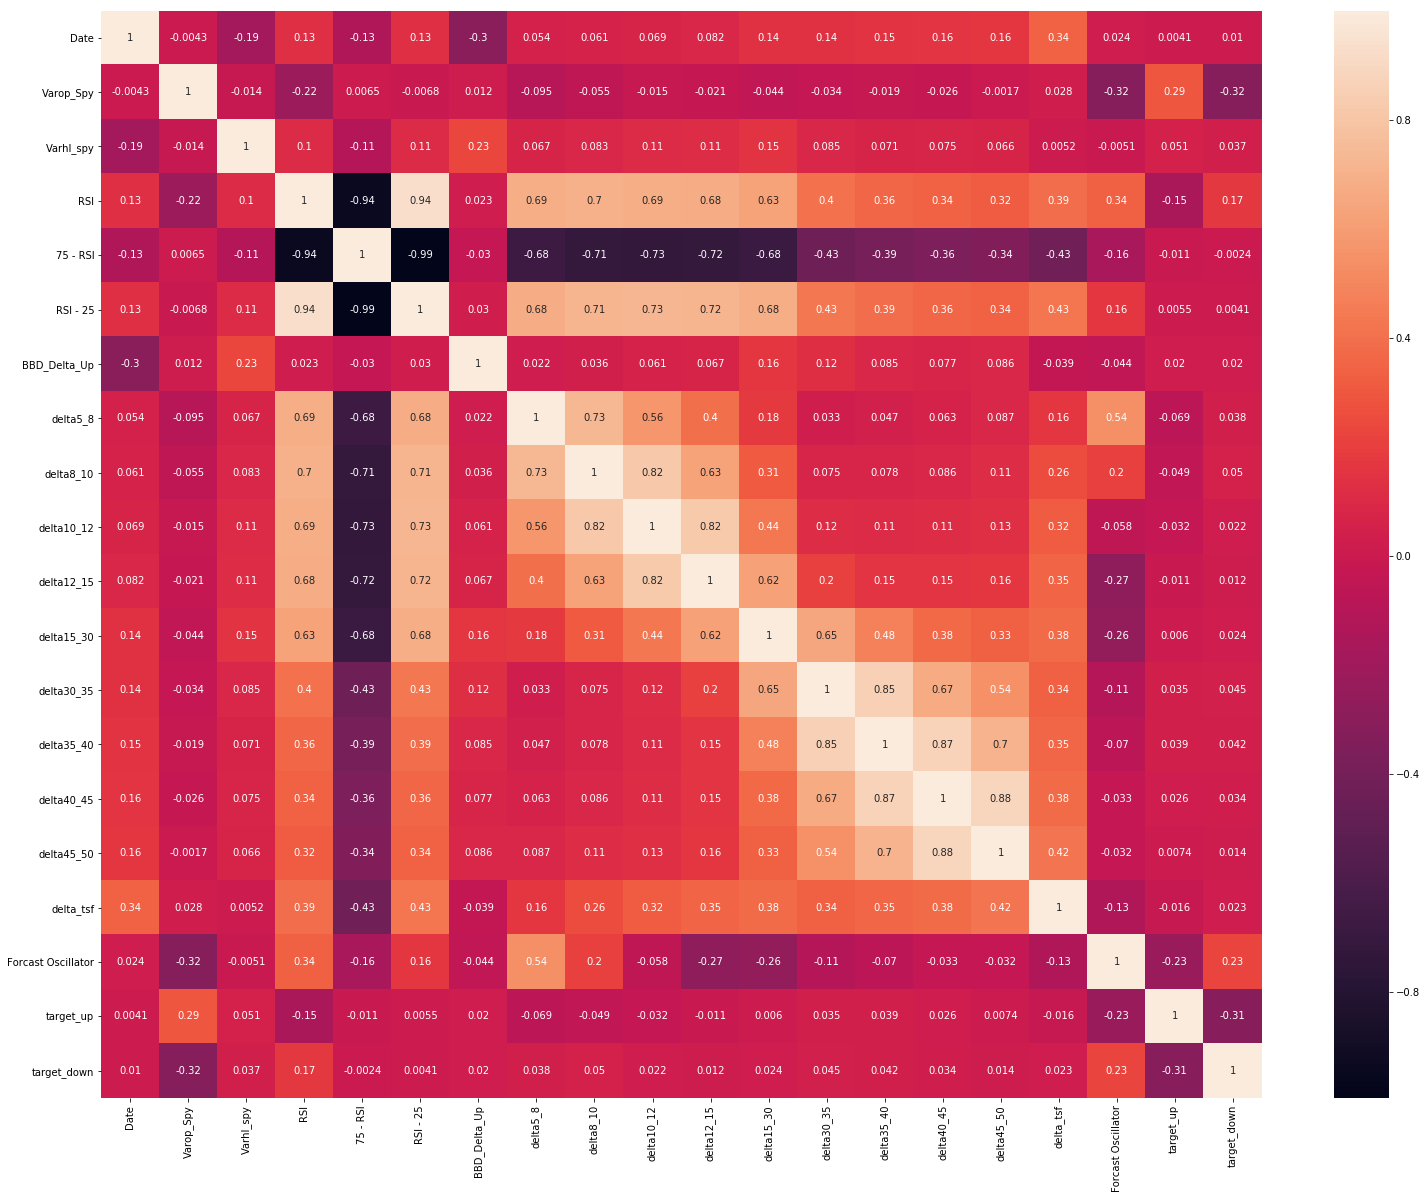

In [208]:
plt.figure(figsize=(26,20))
sns.heatmap(dataset_1D.iloc[:,:-1].corr(),annot=True)
plt.show()

In [209]:
dataset_1D.tail()

Date  Varop_Spy  Varhl_spy        RSI   75 - RSI   RSI - 25  \
1252  20190528      -0.03       0.38  46.573918  24.608774  25.391226   
1253  20190529       0.24       0.52  46.942299  28.426082  21.573918   
1254  20190530      -0.73       0.89  53.951917  28.057701  21.942299   
1255  20190531      -0.78       1.09  64.152400  21.048083  28.951917   
1256  20190603      -0.21       0.40  68.585002  10.847600  39.152400   

      BBD_Delta_Up  delta5_8  delta8_10  delta10_12  ...  delta15_30  \
1252      1.261111  -0.05750   -0.31750   -0.149167  ...    0.316000   
1253      0.799135   0.12450   -0.23850   -0.261500  ...    0.317667   
1254      0.870884   0.28450   -0.03850   -0.249833  ...    0.330333   
1255      1.758698   0.38025    0.11575   -0.140333  ...    0.370667   
1256      2.587854   0.48775    0.24325    0.065500  ...    0.431000   

      delta30_35  delta35_40  delta40_45  delta45_50   delta_tsf  \
1252   -0.235048   -0.087036   -0.231694   -0.214756  120.676813   
1253   -0.212524   -0.117393   -0.158194   -0.261356  120.499890   
1254   -0.131476   -0.151857   -0.107444   -0.285556  120.609560   
1255   -0.024095   -0.195821   -0.062083   -0.275667  121.212088   
1256    0.039762   -0.183429   -0.060667   -0.234733  122.247143   

      Forcast Oscillator  target_up  target_down  target_value  
1252           -0.052112          1            0        120.83  
1253            0.037276          0            0        120.87  
1254            0.832597          0            0        121.69  
1255            2.294746          0            0        123.33  
1256            2.968978          0            1        124.30  

[5 rows x 21 columns]

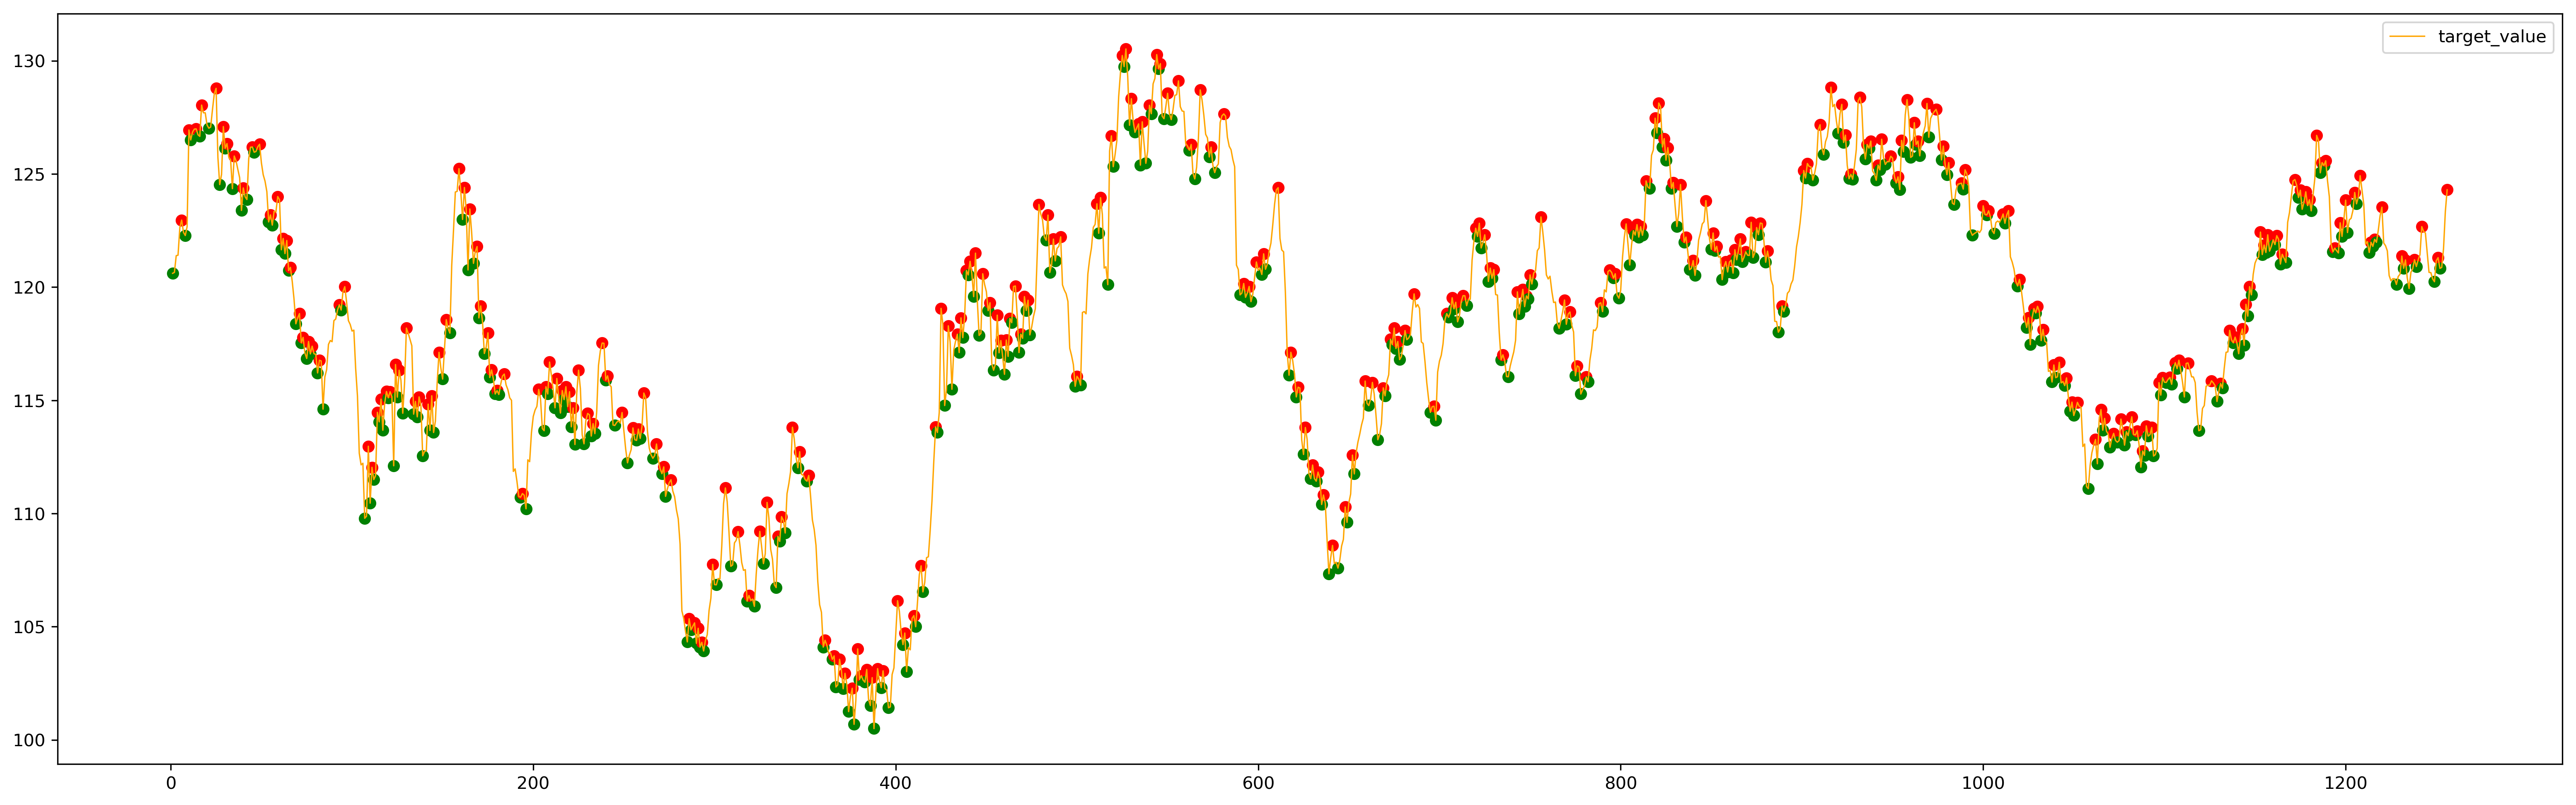

In [210]:
plt.figure(figsize=(26,8),dpi=300)
plt.plot(dataset_1D['target_value'],color='orange',lw=0.8)
for i in range(0,len(dataset_1D)):
    if dataset_1D.iloc[i,-3] == 1:
        plt.scatter(x=dataset_1D.index[i],y=dataset_1D.iloc[i,-1],c='g',marker='o')
    elif dataset_1D.iloc[i,-2] == 1:
        plt.scatter(x=dataset_1D.index[i],y=dataset_1D.iloc[i,-1],c='r',marker='o')
plt.legend()

In [211]:
dataset_1D.to_csv('20190603 data_1D prepared.csv')